In [46]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm

In [47]:
import nltk

import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

# nltk.download()

# nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#creating an object of sentiment intensity analyzer
sia= SentimentIntensityAnalyzer()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [48]:
# Loading airbnb data of 8 cities
montreal = pd.read_csv('Dataset/Airbnb/Montreal.csv')
newbrunswick = pd.read_csv('Dataset/Airbnb/NewBrunswick.csv')
ottawa = pd.read_csv('Dataset/Airbnb/Ottawa.csv')
quebeccity = pd.read_csv('Dataset/Airbnb/QuebecCity.csv')
toronto = pd.read_csv('Dataset/Airbnb/Toronto.csv')
vancouver = pd.read_csv('Dataset/Airbnb/Vancouver.csv')
victoria = pd.read_csv('Dataset/Airbnb/Victoria.csv')
winnipeg = pd.read_csv('Dataset/Airbnb/Winnipeg.csv')


# Adding a City column to each dataframes
montreal['City'] = 'Montreal'
newbrunswick['City'] = 'New Brunswick'
ottawa['City'] = 'Ottawa'
quebeccity['City'] = 'Quebec City'
toronto['City'] = 'Toronto'
vancouver['City'] = 'Vancouver'
victoria['City'] = 'Victoria'
winnipeg['City'] = 'Winnipeg'

# Merging data from different cities to a single dataframe
airbnb_df = pd.concat([montreal, newbrunswick, ottawa, quebeccity, toronto, vancouver, victoria, winnipeg], ignore_index=True)

In [49]:
airbnb_df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,City
0,29059,https://www.airbnb.com/rooms/29059,20240323015116,2024-03-23,city scrape,Lovely studio Quartier Latin,CITQ 267153<br />Lovely studio with 1 closed r...,NaN,https://a0.muscache.com/pictures/736399/fa6c31...,125031,...,4.82,4.68,"267153, expires: 2024-03-31",f,2,2,0,0,2.69,Montreal
1,29061,https://www.airbnb.com/rooms/29061,20240323015116,2024-03-23,city scrape,Maison historique - Quartier Latin,Lovely historic house with plenty of period ch...,NaN,https://a0.muscache.com/pictures/9e59d417-4b6a...,125031,...,4.87,4.73,"267153, expires: 2024-03-31",f,2,2,0,0,0.88,Montreal
2,36301,https://www.airbnb.com/rooms/36301,20240323015116,2024-03-23,city scrape,Romantic & peaceful Plateau loft,"Enjoy the best of Montreal in this romantic, ...",The neighborhood is very lively while the stre...,https://a0.muscache.com/pictures/26c20544-475f...,381468,...,4.88,4.76,NaN,f,3,3,0,0,0.47,Montreal
3,38118,https://www.airbnb.com/rooms/38118,20240323015116,2024-03-23,city scrape,Beautiful room with a balcony in front of a parc,Nearest metro Papineau.,NaN,https://a0.muscache.com/pictures/213997/763ec1...,163569,...,4.63,4.38,NaN,f,1,0,1,0,0.10,Montreal
4,50479,https://www.airbnb.com/rooms/50479,20240323015116,2024-03-23,city scrape,L'Arcade Douce,The appartement is sunny and ideally situated ...,Our area is full of life (but our street is qu...,https://a0.muscache.com/pictures/miso/Hosting-...,231694,...,4.84,4.93,"271530, expires: 2024-04-30",t,2,1,1,0,1.60,Montreal


In [50]:
sentiment_df = airbnb_df[['id', 'name', 'description', 'price']]
sentiment_df.head()

,id,name,description,price
0,29059,Lovely studio Quartier Latin,CITQ 267153<br />Lovely studio with 1 closed r...,$164.00
1,29061,Maison historique - Quartier Latin,Lovely historic house with plenty of period ch...,$349.00
2,36301,Romantic & peaceful Plateau loft,"Enjoy the best of Montreal in this romantic, ...",$175.00
3,38118,Beautiful room with a balcony in front of a parc,Nearest metro Papineau.,$50.00
4,50479,L'Arcade Douce,The appartement is sunny and ideally situated ...,$90.00


In [51]:
sentiment_df['price'] = sentiment_df['price'].str.replace('[$,]', '', regex=True).astype(float)

In [52]:
sentiment_df['log_price'] = np.log(sentiment_df['price'])

In [53]:
#creating new column scores using polarity scores function
sentiment_df['name_scores']=sentiment_df['name'].apply(lambda name: sia.polarity_scores(str(name)))
sentiment_df.head()

,id,name,description,price,log_price,name_scores
0,29059,Lovely studio Quartier Latin,CITQ 267153<br />Lovely studio with 1 closed r...,164.0,5.099866,"{'neg': 0.0, 'neu': 0.441, 'pos': 0.559, 'comp..."
1,29061,Maison historique - Quartier Latin,Lovely historic house with plenty of period ch...,349.0,5.855072,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,36301,Romantic & peaceful Plateau loft,"Enjoy the best of Montreal in this romantic, ...",175.0,5.164786,"{'neg': 0.0, 'neu': 0.253, 'pos': 0.747, 'comp..."
3,38118,Beautiful room with a balcony in front of a parc,Nearest metro Papineau.,50.0,3.912023,"{'neg': 0.0, 'neu': 0.642, 'pos': 0.358, 'comp..."
4,50479,L'Arcade Douce,The appartement is sunny and ideally situated ...,90.0,4.499810,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [54]:
sentiment_df['name_sentiment']=sentiment_df['name_scores'].apply(lambda score_dict:score_dict['compound'])
sentiment_df.drop(['name', 'name_scores'], axis=1, inplace=True)
sentiment_df.head()

,id,description,price,log_price,name_sentiment
0,29059,CITQ 267153<br />Lovely studio with 1 closed r...,164.0,5.099866,0.5859
1,29061,Lovely historic house with plenty of period ch...,349.0,5.855072,0.0000
2,36301,"Enjoy the best of Montreal in this romantic, ...",175.0,5.164786,0.7096
3,38118,Nearest metro Papineau.,50.0,3.912023,0.5994
4,50479,The appartement is sunny and ideally situated ...,90.0,4.499810,0.0000


In [55]:
#creating new column scores using polarity scores function
sentiment_df['description_scores']=sentiment_df['description'].apply(lambda description: sia.polarity_scores(str(description)))
sentiment_df.head()

,id,description,price,log_price,name_sentiment,description_scores
0,29059,CITQ 267153<br />Lovely studio with 1 closed r...,164.0,5.099866,0.5859,"{'neg': 0.0, 'neu': 0.87, 'pos': 0.13, 'compou..."
1,29061,Lovely historic house with plenty of period ch...,349.0,5.855072,0.0000,"{'neg': 0.0, 'neu': 0.57, 'pos': 0.43, 'compou..."
2,36301,"Enjoy the best of Montreal in this romantic, ...",175.0,5.164786,0.7096,"{'neg': 0.0, 'neu': 0.347, 'pos': 0.653, 'comp..."
3,38118,Nearest metro Papineau.,50.0,3.912023,0.5994,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,50479,The appartement is sunny and ideally situated ...,90.0,4.499810,0.0000,"{'neg': 0.017, 'neu': 0.884, 'pos': 0.098, 'co..."


In [56]:
sentiment_df['description_sentiment']=sentiment_df['description_scores'].apply(lambda score_dict:score_dict['compound'])
sentiment_df.drop(['description', 'description_scores'], axis=1, inplace=True)
sentiment_df.head()

,id,price,log_price,name_sentiment,description_sentiment
0,29059,164.0,5.099866,0.5859,0.6908
1,29061,349.0,5.855072,0.0000,0.9153
2,36301,175.0,5.164786,0.7096,0.9510
3,38118,50.0,3.912023,0.5994,0.0000
4,50479,90.0,4.499810,0.0000,0.7506


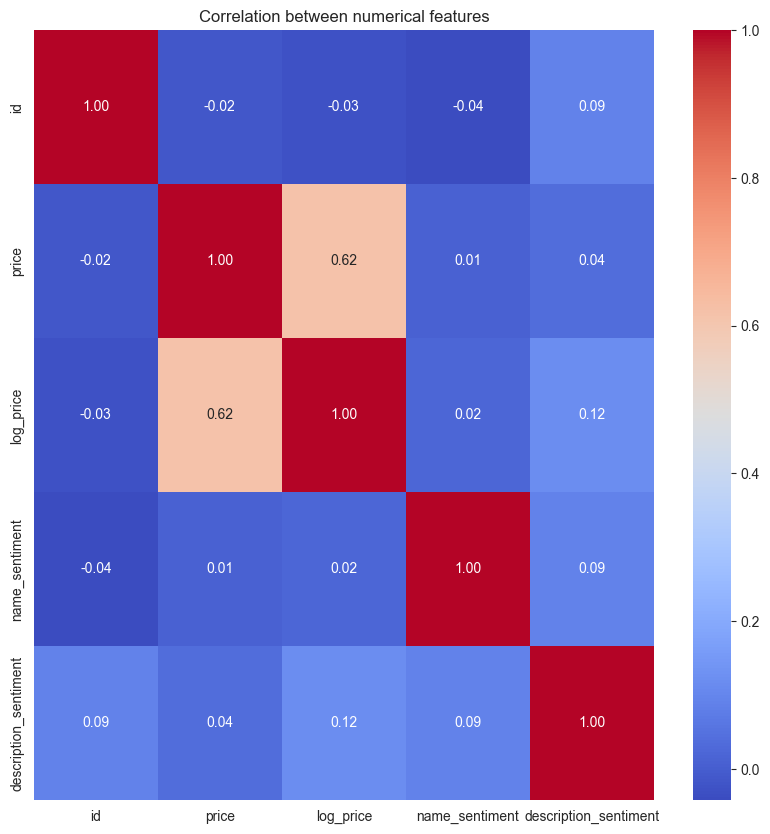

log_price                1.000000
price                    0.616632
description_sentiment    0.117166
name_sentiment           0.018786
id                      -0.028760
Name: log_price, dtype: float64

In [58]:
plt.figure(figsize=(10,10))
sns.heatmap(sentiment_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation between numerical features')
plt.show()

#which features have the highest correlation with price
sentiment_df.corr()['log_price'].sort_values(ascending=False)

In [59]:
# sentiment_df.to_csv('Dataset/Sentiment/title_description.csv', index=False)